### Data Info
Clustering the data collected by Sarah. The data are ratings of vignettes of shame/guilt/neutral. 
Gievn that there are a plenty of vignettes, each subject was asked to rate 1/3 of the total vignettes.

### Load packages

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Data Cleaning

In [140]:
# Load data & basic info
df0 = pd.read_csv(r"..\Data\AllParticipantsData.csv", sep=",", na_values = "#NULL!") # #NULL! -> NaN
#df0 = pd.read_csv(r"..\Data\VeteranData.csv", sep=",", na_values = ['#NULL!',' ']) # #NULL! -> NaN
#df0 = pd.read_csv("..\Data\AllParticipantsData.csv", skipinitialspace=True) # non-numerical inputs -> NaN, but failed?
df0.info()
df0.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 3236 entries, SubID to MeanNeutral
dtypes: float64(3235), int64(1)
memory usage: 2.1 MB


<bound method NDFrame.head of      SubID  GuiltQ35_Fear  GuiltQ35_Nervousness  GuiltQ35_Sadness  \
0   273949            1.0                   2.0               4.0   
1   292592            1.0                   2.0               4.0   
2   234366            2.0                   2.0               4.0   
3   986469            1.0                   1.0               3.0   
4   205611            1.0                   2.0               3.0   
..     ...            ...                   ...               ...   
80  583204            NaN                   NaN               NaN   
81  700642            NaN                   NaN               NaN   
82  703108            NaN                   NaN               NaN   
83  863993            NaN                   NaN               NaN   
84  901148            NaN                   NaN               NaN   

    GuiltQ35_Sympathy  GuiltQ35_Neglect  GuiltQ35_Shame  GuiltQ35_Guilt  \
0                 1.0               1.0             4.0           

In [141]:
# Select the columns of interest
filter_col = [col for col in df0 if col.startswith('GuiltQ35') ] # just for example
df = df0[filter_col]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GuiltQ35_Fear          25 non-null     float64
 1   GuiltQ35_Nervousness   25 non-null     float64
 2   GuiltQ35_Sadness       25 non-null     float64
 3   GuiltQ35_Sympathy      25 non-null     float64
 4   GuiltQ35_Neglect       25 non-null     float64
 5   GuiltQ35_Shame         25 non-null     float64
 6   GuiltQ35_Guilt         25 non-null     float64
 7   GuiltQ35_Suffering     25 non-null     float64
 8   GuiltQ35_Torment       25 non-null     float64
 9   GuiltQ35_Envy          25 non-null     float64
 10  GuiltQ35_Disgust       25 non-null     float64
 11  GuiltQ35_Rage          25 non-null     float64
 12  GuiltQ35_Frustration   25 non-null     float64
 13  GuiltQ35_Irritation    25 non-null     float64
 14  GuiltQ35_Surprise      25 non-null     float64
 15  GuiltQ35

,GuiltQ35_Fear,GuiltQ35_Nervousness,GuiltQ35_Sadness,GuiltQ35_Sympathy,GuiltQ35_Neglect,GuiltQ35_Shame,GuiltQ35_Guilt,GuiltQ35_Suffering,GuiltQ35_Torment,GuiltQ35_Envy,...,GuiltQ35_Joy,GuiltQ35_Optimism,GuiltQ35_Pride,GuiltQ35_Contentment,GuiltQ35_Excitement,GuiltQ35_Cheerfulness,GuiltQ35_Longing,GuiltQ35_Lust,GuiltQ35_Affection,GuiltQ35_Neutral
0,1.0,2.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0
1,1.0,2.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
2,2.0,2.0,4.0,4.0,1.0,3.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,3.0,4.0,2.0,4.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
4,1.0,2.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
5,2.0,2.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

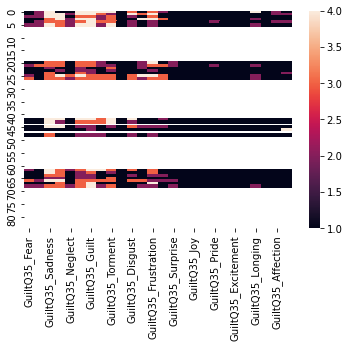

In [142]:
sns.heatmap(df) # To show if there are nissing values

In [143]:
# Remove rows with NaN
df.isnull().sum() # show the number of NaNs per column
df = df.dropna() # drop the rows of NaN
df.info()
df.mean().sort_values(ascending=False) # sort the values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 68
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GuiltQ35_Fear          25 non-null     float64
 1   GuiltQ35_Nervousness   25 non-null     float64
 2   GuiltQ35_Sadness       25 non-null     float64
 3   GuiltQ35_Sympathy      25 non-null     float64
 4   GuiltQ35_Neglect       25 non-null     float64
 5   GuiltQ35_Shame         25 non-null     float64
 6   GuiltQ35_Guilt         25 non-null     float64
 7   GuiltQ35_Suffering     25 non-null     float64
 8   GuiltQ35_Torment       25 non-null     float64
 9   GuiltQ35_Envy          25 non-null     float64
 10  GuiltQ35_Disgust       25 non-null     float64
 11  GuiltQ35_Rage          25 non-null     float64
 12  GuiltQ35_Frustration   25 non-null     float64
 13  GuiltQ35_Irritation    25 non-null     float64
 14  GuiltQ35_Surprise      25 non-null     float64
 15  GuiltQ35

GuiltQ35_Sadness         3.08
GuiltQ35_Guilt           3.00
GuiltQ35_Shame           2.88
GuiltQ35_Sympathy        2.76
GuiltQ35_Torment         2.48
GuiltQ35_Frustration     2.40
GuiltQ35_Suffering       2.08
GuiltQ35_Disgust         1.96
GuiltQ35_Rage            1.64
GuiltQ35_Irritation      1.52
GuiltQ35_Fear            1.40
GuiltQ35_Neglect         1.36
GuiltQ35_Longing         1.36
GuiltQ35_Nervousness     1.36
GuiltQ35_Neutral         1.24
GuiltQ35_Surprise        1.16
GuiltQ35_Affection       1.12
GuiltQ35_Pride           1.08
GuiltQ35_Relief          1.00
GuiltQ35_Joy             1.00
GuiltQ35_Optimism        1.00
GuiltQ35_Envy            1.00
GuiltQ35_Contentment     1.00
GuiltQ35_Excitement      1.00
GuiltQ35_Cheerfulness    1.00
GuiltQ35_Lust            1.00
dtype: float64

,GuiltQ35_Fear,GuiltQ35_Nervousness,GuiltQ35_Sadness,GuiltQ35_Sympathy,GuiltQ35_Neglect,GuiltQ35_Shame,GuiltQ35_Guilt,GuiltQ35_Suffering,GuiltQ35_Torment,GuiltQ35_Envy,...,GuiltQ35_Joy,GuiltQ35_Optimism,GuiltQ35_Pride,GuiltQ35_Contentment,GuiltQ35_Excitement,GuiltQ35_Cheerfulness,GuiltQ35_Longing,GuiltQ35_Lust,GuiltQ35_Affection,GuiltQ35_Neutral
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,...,25.0,25.0,25.000000,25.0,25.0,25.0,25.00,25.0,25.000000,25.000000
mean,1.400000,1.360000,3.080000,2.760000,1.360000,2.880000,3.000000,2.080000,2.480000,1.0,...,1.0,1.0,1.080000,1.0,1.0,1.0,1.36,1.0,1.120000,1.240000
std,0.645497,0.568624,0.996661,1.090871,0.568624,0.832666,0.912871,0.996661,1.045626,0.0,...,0.0,0.0,0.276887,0.0,0.0,0.0,0.70,0.0,0.331662,0.663325
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000
25%,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000
50%,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,1.0,...,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000
75%,2.000000,2.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.000000,3.000000,1.0,...,1.0,1.0,1.000000,1.0,1.0,1.0,2.00,1.0,1.000000,1.000000
max,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,1.0,...,1.0,1.0,2.000000,1.0,1.0,1.0,4.00,1.0,2.000000,4.000000


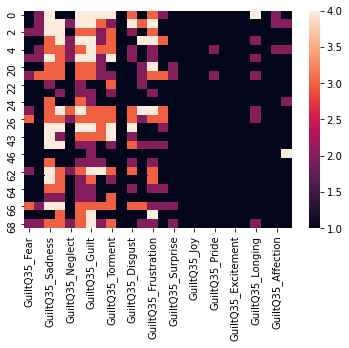

In [144]:
sns.heatmap(df)
df.describe()

[Text(0.5, 1.0, 'GuiltQ35'), Text(0.5, 0, 'Ratings'), Text(0, 0.5, 'Type')]

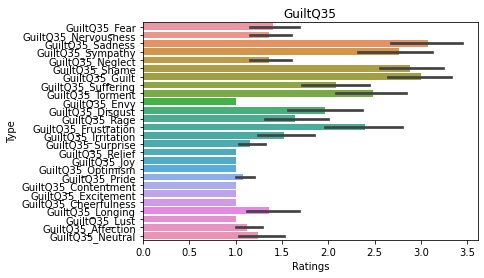

In [145]:
sns.barplot(data=df, orient="h").set(title="GuiltQ35", xlabel="Ratings", ylabel="Type")

### Analyses

In [146]:
# Names of questions
filter_col = [col for col in df0 if col.endswith('_Fear') ] # search for all columns ends with _Fear
names_question = [w.replace('_Fear','') for w in filter_col] # totally 120 questions
print('\nSample questions:\n',names_question[:20])

# Names of items/question
filter_col = [col for col in df0 if col.startswith(names_question[0]) ] # search for all columns starts with GuiltQ35 for example
names_item = [w.replace(names_question[0]+'_','') for w in filter_col] # totally 26 items per question
print('\nItems per question:\n',names_item)


Sample questions:
 ['GuiltQ35', 'ShameQ113', 'NeutralQ77', 'ShameQ83', 'NeutralQ64', 'GuiltQ31', 'NeutralQ47', 'GuiltQ37', 'ShameQ95', 'NeutralQ61', 'ShameQ116', 'GuiltQ3', 'ShameQ101', 'GuiltQ29', 'NeutralQ57', 'GuiltQ2', 'NeutralQ46', 'ShameQ89', 'NeutralQ71', 'ShameQ87']

Items per question:
 ['Fear', 'Nervousness', 'Sadness', 'Sympathy', 'Neglect', 'Shame', 'Guilt', 'Suffering', 'Torment', 'Envy', 'Disgust', 'Rage', 'Frustration', 'Irritation', 'Surprise', 'Relief', 'Joy', 'Optimism', 'Pride', 'Contentment', 'Excitement', 'Cheerfulness', 'Longing', 'Lust', 'Affection', 'Neutral']


In [147]:
# Calculate values for each item and each question
for question in names_question:
    filter_col = [question + '_' + name for name in names_item] # all columns of a particular question
    df = df0[filter_col] # new df contain only the items associated with a particular question
    df = df.dropna() # drop the rows containing NaN
    
    #values = list(df.mean()/df.std()) # effect size
    values = list(df.median()) # median
    
    # new df1 to store the value per item (row) and per question (column)
    if question in names_question[0]:
        df1 = pd.DataFrame(values, columns=[question], index=names_item)
    else:
        df1[question] = values
        
df = df1.transpose() # new df: row = question, column = item
df

,Fear,Nervousness,Sadness,Sympathy,Neglect,Shame,Guilt,Suffering,Torment,Envy,...,Joy,Optimism,Pride,Contentment,Excitement,Cheerfulness,Longing,Lust,Affection,Neutral
GuiltQ3,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ101,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ29,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NeutralQ57,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0
GuiltQ2,1.0,1.0,4.0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ShameQ92,3.0,2.5,4.0,3.0,1.0,4.0,4.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ5,2.0,3.0,4.0,4.0,1.5,3.0,3.5,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
NeutralQ41,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0
GuiltQ13,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [148]:
# Questions with the largest values of Shame
df.sort_values(by=['Shame','Guilt'], ascending=[False,True])[:5] # the top question for Shame but not Guilt is ShameQ112

,Fear,Nervousness,Sadness,Sympathy,Neglect,Shame,Guilt,Suffering,Torment,Envy,...,Joy,Optimism,Pride,Contentment,Excitement,Cheerfulness,Longing,Lust,Affection,Neutral
ShameQ112,1.0,1.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ119,2.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ103,1.0,2.0,3.0,1.0,1.0,4.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ91,2.0,1.0,4.0,3.0,2.0,4.0,4.0,3.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
ShameQ82,2.0,2.0,3.0,2.0,1.0,4.0,4.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [149]:
# Questions with the largest values of Guilt
df.sort_values(by=['Guilt','Shame'], ascending=[False,True])[:5] # the top question for Guilt but not Shame is GuiltQ21

,Fear,Nervousness,Sadness,Sympathy,Neglect,Shame,Guilt,Suffering,Torment,Envy,...,Joy,Optimism,Pride,Contentment,Excitement,Cheerfulness,Longing,Lust,Affection,Neutral
GuiltQ21,2.0,1.0,4.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ2,1.0,1.0,4.0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ7,1.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ12,2.0,2.0,3.0,2.0,1.0,3.0,4.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ38,1.0,2.0,3.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [150]:
# Function of Radar (or Spider) plot
# codes from https://aakashkh.github.io/python/visualisation/2019/08/26/Plotting-Seaborn-Radar.html
def make_spider(df, row, color):
    
    categories=list(df) # feature (column) names of df
    N = len(categories) # number of features

    
    angles = [n / float(N) * 2 * np.pi for n in range(N)] # devide the circle into N sections
    angles += angles[:1] # a closed circle: last point == first point
     
    plt.rc('figure', figsize=(5, 5))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(np.pi / 2) # begins from (and also ends at) pi/2
    ax.set_theta_direction(-1) # clock-wise
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12) # ticks not include the last point (same as the first point)
    ax.tick_params(axis='x', rotation=10) # ticks displayed with a predefined degree
    
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4], ["1","2","3","4"], color="black", size=10) # ticks along the radius
    plt.ylim(0,4)
 
    
    #values = df.reset_index().loc[row].values.tolist()[1:]
    #values = list(df.median()) #
    values = list(df.loc[row])
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.5)
    #ax.legend(['ShameQ112','GuiltQ21'], loc='upper right', bbox_to_anchor=(1.4, 1.2))
 
  
    title = 'Radar Plot of 26 Items'
    plt.title(title, fontsize=24, x = 0.5, y = 1.1)

In [151]:
df

,Fear,Nervousness,Sadness,Sympathy,Neglect,Shame,Guilt,Suffering,Torment,Envy,...,Joy,Optimism,Pride,Contentment,Excitement,Cheerfulness,Longing,Lust,Affection,Neutral
GuiltQ3,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ101,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ29,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NeutralQ57,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0
GuiltQ2,1.0,1.0,4.0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ShameQ92,3.0,2.5,4.0,3.0,1.0,4.0,4.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ5,2.0,3.0,4.0,4.0,1.5,3.0,3.5,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
NeutralQ41,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0
GuiltQ13,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


<ipython-input-150-2797c3658a94>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,1,1, polar=True)


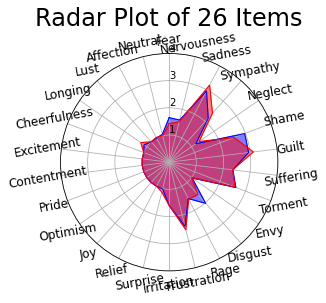

In [152]:
# Calculate the mean scores of Shame questions and Guilt questions, respectively
df1 = [] # clear df1
df1 = pd.DataFrame(list(df[df.index.str.startswith('Shame')].mean()), columns=['Shame'], index=names_item) # the first column of df1
df1['Guilt'] = list(df[df.index.str.startswith('Guilt')].mean()) # add a new column for the mean score of Guilt questions
df1 = df1.transpose() # 2 x 26 df

# Radar plots of the mean scores of Shame questions and Guilt questions, respectively
plt.figure()
make_spider(row='Shame', df=df1, color='blue') # mean of Shame questions, blue color
make_spider(row='Guilt', df=df1, color='red') # mean of Guilt questions, pink color

<ipython-input-150-2797c3658a94>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,1,1, polar=True)


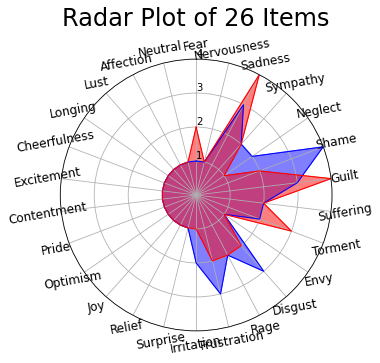

In [153]:
# Display the 2 questions with the largest Shame or Guilt ratings
plt.figure()
make_spider(row='ShameQ112', df=df, color='blue') # blue color
make_spider(row='GuiltQ21',  df=df, color='red')  # red color

### Clustering

In [154]:
# Kmeans Clustering (seems can't differentiate the two most prominent Shame and Guilt questions)
from sklearn.cluster import KMeans
X = df.to_numpy() # pandas df to array， 109 * 26 array
clustering = KMeans(n_clusters=3, random_state=0).fit(X)
df1 = df # a copy of data
df1['label_kmeans'] = clustering.labels_ # save the labels into dataframe

# List the questions per cluster
list_label = np.unique(df1['label_kmeans'])
for label in list_label:
    print(f'\nlabel_kmeans={label}:\n', df1.loc[df1.label_kmeans==label].index)


label_kmeans=0:
 Index(['GuiltQ3', 'ShameQ101', 'GuiltQ29', 'ShameQ89', 'ShameQ87', 'GuiltQ34',
       'ShameQ100', 'ShameQ109', 'GuiltQ39', 'GuiltQ10', 'ShameQ102',
       'NeutralQ51', 'GuiltQ23', 'ShameQ108', 'ShameQ93', 'ShameQ99',
       'ShameQ88', 'ShameQ117', 'GuiltQ30', 'GuiltQ32', 'ShameQ84',
       'ShameQ107', 'GuiltQ6', 'GuiltQ40', 'ShameQ110', 'ShameQ81', 'GuiltQ17',
       'GuiltQ9', 'GuiltQ8', 'GuiltQ24', 'GuiltQ33', 'GuiltQ25'],
      dtype='object')

label_kmeans=1:
 Index(['NeutralQ57', 'NeutralQ46', 'NeutralQ71', 'NeutralQ48', 'NeutralQ50',
       'NeutralQ76', 'NeutralQ69', 'NeutralQ53', 'NeutralQ58', 'NeutralQ52',
       'NeutralQ78', 'NeutralQ67', 'NeutralQ63', 'NeutralQ45', 'NeutralQ54',
       'NeutralQ68', 'NeutralQ42', 'NeutralQ79', 'NeutralQ74', 'NeutralQ56',
       'NeutralQ75', 'NeutralQ49', 'NeutralQ73', 'NeutralQ43', 'NeutralQ62',
       'NeutralQ59', 'NeutralQ80', 'ShameQ86', 'NeutralQ60', 'NeutralQ70',
       'NeutralQ44', 'NeutralQ72', 'NeutralQ66', 

In [155]:
# Spectral Clustering (seems work in differentiating the two most significant Shame and Guilt questions)
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0).fit(X)
df1 = df # a copy of data
df1['label_spectral'] = clustering.labels_ # save the labels into dataframe

# List the questions per cluster
list_label = np.unique(df1['label_spectral'])
for label in list_label:
    print(f'\nlabel_spectral={label}:\n', df1.loc[df1.label_spectral==label].index)


label_spectral=0:
 Index(['ShameQ112', 'GuiltQ19', 'ShameQ111', 'GuiltQ12', 'ShameQ91',
       'ShameQ120', 'ShameQ118', 'ShameQ96', 'GuiltQ15', 'ShameQ114',
       'ShameQ85', 'GuiltQ16', 'GuiltQ27', 'ShameQ119', 'ShameQ82', 'GuiltQ11',
       'GuiltQ36', 'ShameQ106', 'ShameQ90', 'GuiltQ26', 'ShameQ98', 'GuiltQ28',
       'ShameQ105', 'ShameQ92', 'GuiltQ5', 'GuiltQ13', 'ShameQ94'],
      dtype='object')

label_spectral=1:
 Index(['GuiltQ3', 'ShameQ101', 'GuiltQ29', 'GuiltQ2', 'ShameQ89', 'ShameQ87',
       'GuiltQ34', 'GuiltQ7', 'ShameQ100', 'GuiltQ22', 'ShameQ109', 'GuiltQ39',
       'GuiltQ10', 'ShameQ104', 'ShameQ102', 'GuiltQ20', 'ShameQ97',
       'NeutralQ51', 'GuiltQ23', 'ShameQ108', 'GuiltQ1', 'ShameQ93',
       'GuiltQ38', 'ShameQ99', 'ShameQ88', 'GuiltQ21', 'GuiltQ14', 'ShameQ115',
       'ShameQ103', 'GuiltQ4', 'ShameQ117', 'GuiltQ30', 'GuiltQ32', 'ShameQ84',
       'ShameQ107', 'GuiltQ6', 'GuiltQ40', 'ShameQ110', 'GuiltQ18', 'ShameQ81',
       'GuiltQ17', 'GuiltQ9', 'Guil